<IPython.core.display.Javascript object>


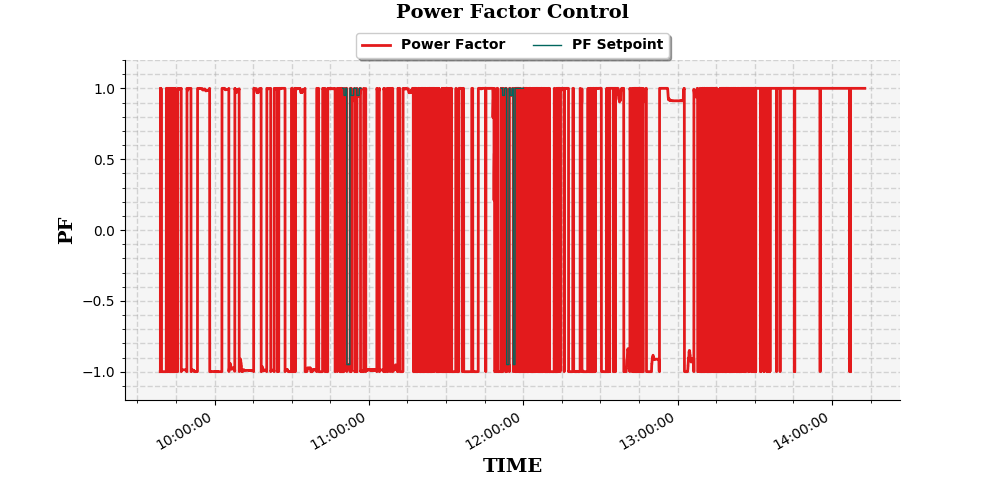

In [5]:
%matplotlib notebook
import plot_maplot_v1
import numpy as np
data = plot_maplot_v1.get_data_from_csv("deaar_test2.csv")
(time,m,s,en)=plot_maplot_v1.get_traces(data)
plot_maplot_v1.plot_PF(time,m['PF'],s['PF'],en['PF'],0.002)

In [1]:
csv=input("Please enter the path of you csv file:")

Please enter the path of you csv file:/home/spiros/Data/Bolero/bolero2.csv


In [4]:
from plot_maplot_v1 import *
data =get_data_from_csv(csv)

Please enter the path of you csv file:/home/spiros/Data/Bolero/bolero2.csv
Traces Found:

Measurements
------------
P ------> ppc:P0
Q ------> ppc:Q0
V ------> ppc:V0
F ------> ppc:F
PF ------> ppc:PF
Setpoints
------------
P ------> apc:PSP0_eff
Q ------> rpc:QSP0_eff
AVR ------> avr:VSP0
F ------> apc:FSP
PF ------> pfc:PFSP
Enable/Disable
-------------
P ------> apc:En
Q ------> rpc:En
AVR ------> avr:En
F ------> apc:FCEn
PF ------> pfc:En

What plot would you like to generate?

Available Choises

1 ) P
2 ) Q
3 ) AVR
4 ) F
5 ) PF
6 ) Q Capability
7 ) All Measurements
Choose by Number:1


Enter the desired setpoint deadband(kW):50


<IPython.core.display.Javascript object>


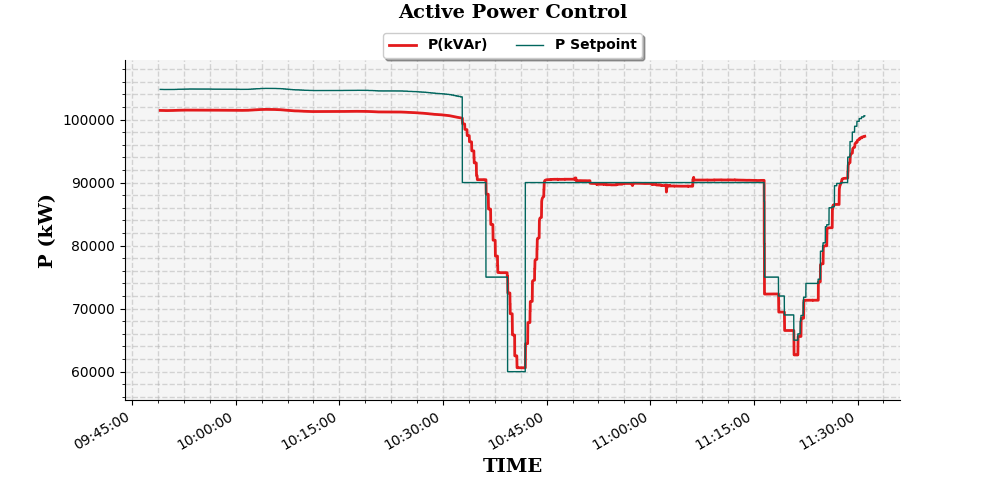

/home/spiros/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [2]:
%matplotlib notebook
from plot_maplot_v1 import *

CBLACK  = '\33[30m'
CRED    = '\33[31m'
CGREEN  = '\33[32m'
CYELLOW = '\33[33m'
CBLUE   = '\33[34m'
CBLACKBG  = '\33[40m'
CREDBG    = '\33[41m'
CGREENBG  = '\33[42m'
CYELLOWBG = '\33[43m'
CBLUEBG   = '\33[44m'
CBOLD = '\33[1m'
CURL = '\33[4m'
CEND = '\33[0m'

csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
print(CBOLD+"Traces Found:"+CEND+"\n")
print(CBOLD+"Measurements"+CEND)
print("------------")
for k in m.keys():
    print(k,"------>",m[k].name)
print(CBOLD+"Setpoints"+CEND)
print("------------")
plots=dict()
i=1
for k in s.keys():
    plots[str(i)]=k
    print(k,"------>",s[k].name)
    i=i+1
if ('P' in s.keys())&('Q' in s.keys()):
    plots[str(i)]='Q Capability'
    i=i+1
plots[str(i)]="All Measurements"
print(CBOLD+"Enable/Disable"+CEND)
print("-------------")
for k in en.keys():
    print(k,"------>",en[k].name)
    
print("\n"+"What plot would you like to generate?"+"\n\n"+CBOLD+"Available Choises"+CEND+"\n")
for k,v, in plots.items():
    print(k,")",v)
while True:
    choise = input(CBOLD+"Choose by Number:"+CEND)
    print("\n")
    try:
        choise=int(choise)
        if choise in range(1,len(plots)+1):
            break
        else:
            print("\n"+"Enter a valid nuber"+"\n")
    except:
        print("\n"+"Enter a valid nuber:"+"\n")

if plots[str(choise)]=="P":
    pdb=float(input("Enter the desired setpoint deadband(kW):"))
    plot_P(time,m['P'],s['P'],en['P'],pdb)
elif  plots[str(choise)]=="Q":
    qdb=float(input("Enter the desired setpoint deadband(kVAr):"))
    plot_Q(time,m['Q'],s['Q'],en['Q'],qdb)
elif  plots[str(choise)]=="AVR":
    avrdb=float(input("Enter the desired setpoint deadband(V):"))
    plot_AVR(time,m['V'],s['AVR'],m['Q'],en['AVR'],avrdb)
elif  plots[str(choise)]=="QV":
    qdb=float(input("Enter the desired setpoint deadband(kVAr):"))
    plot_QV(time,m['V'],s['QV'],m['Q'],s['Q'],en['QV'],qdb)
elif  plots[str(choise)]=="F":
    pdb=float(input("Enter the desired setpoint deadband(kW):"))
    plot_F_P(time,m['P'],s['P'],m['F'],s['F'],en['F'],pdb)
elif  plots[str(choise)]=="PF":
    pfdb=float(input("Enter the desired setpoint deadband:"))
    plot_PF(time,m['PF'],s['PF'],en['PF'],pfdb)
elif  plots[str(choise)]=="All Measurements":
    plot_meas(time,m['P'],m['Q'],m['V'],m['PF'],m['F'])
elif  plots[str(choise)]=="Q Capability":
    qdb=float(input("Enter the desired setpoint deadband(kVAr):"))
    plot_PQ(time,m['P'],m['Q'],s['Q'],en['Q'],qdb)

In [21]:
data['rpc:En'].describe()

count    6120.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: rpc:En, dtype: float64

In [12]:
for i in range(1,5):
    print(i)

1
2
3
4


In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


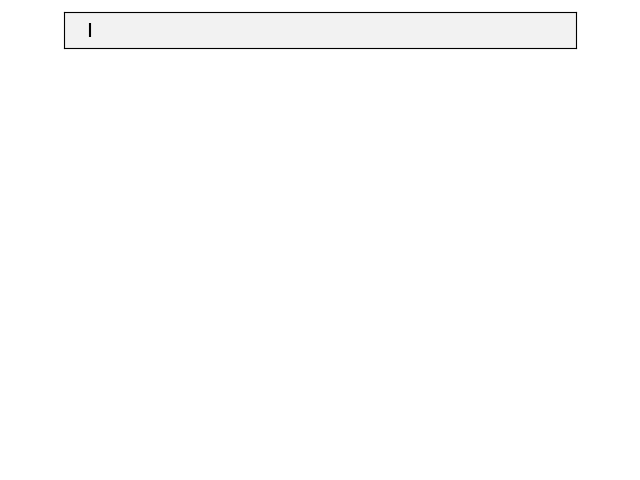

In [23]:
import matplotlib.pyplot as plt
import matplotlib.widgets

temp_descr = 'wow'
axLabel = plt.axes([0.1, 0.9, 0.8, 0.075])
textbox = matplotlib.widgets.TextBox(axLabel, '', temp_descr)

textbox.set_val("jojojo")

plt.show()

In [10]:
textbox.ax

In [11]:
textbox=matplotlib.widgets.TextBox()

TypeError: __init__() missing 2 required positional arguments: 'ax' and 'label'

<IPython.core.display.Javascript object>


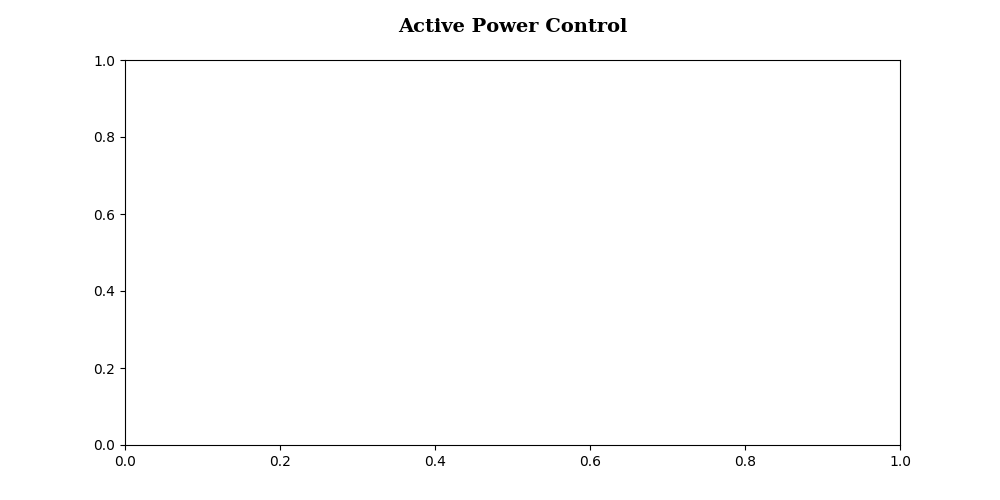

In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import tkinter as tk


font = {'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 14,
    }
global master

def onpick_title(event):
    global master
    pick = event.artist
    
    def change_title():
        global master
        if e1.get()!='':
            ax.set_title(e1.get(),fontdict=font,x=0.5,y=1.05)
            fig.canvas.draw()
            master.destroy()

    try:
        ax.set_title(str(slave.winfo_exists()),fontdict=font,x=0.5,y=1.05)
        fig.canvas.draw() 
        return
    except:  
        if (pick==title):
            master = tk.Tk(className=' TITLE')
            slave=master
            master.resizable(width=False, height=False)
            tk.Label(master, text="Insert Title").grid(row=0)
            e1 = tk.Entry(master,bd=5,width=40)
            e1.insert(0,title.get_text())
            e1.grid(row=0, column=1)
            tk.Button(master, text='Quit',
            command=master.destroy).grid(row=3, column=0, sticky=tk.W, pady=4)
            tk.Button(master,text='Apply title', command=change_title).grid(row=3,column=1,sticky=tk.W, pady=4)
            master.mainloop()
        
fig, ax = plt.subplots(figsize=(10,5))
title = ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.05)
title.set_picker(5)
cid=fig.canvas.mpl_connect('pick_event', onpick_title)


In [2]:
import tkinter as tk
  
def new_window1():
    global win1
    try:
        if win1.state() == "normal": win1.focus()
    except:
        win1 = tk.Toplevel()
        win1.geometry("300x300+500+200")
        win1["bg"] = "navy"
        lb = tk.Label(win1, text="Hello")
        lb.pack()
 
 
win = tk.Tk()
win.geometry("200x200+200+100")
button = tk.Button(win, text="Open new Window")
button['command'] = new_window1
button.pack()
win.mainloop()


In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("/media/spiros/my_data/Kazakstan/q_p.csv")

In [3]:
data

,Q,V,Q/Pmax,V(p.u)
0,-5055.425781,29325.0,-0.506,0.85
1,-5066.863770,29325.0,-0.507,0.85
2,-5084.019531,29325.0,-0.508,0.85
3,-5084.019531,29325.0,-0.508,0.85
4,-5089.738770,29325.0,-0.509,0.85
...,...,...,...,...
381,6427.939453,29325.0,0.643,0.85
382,6427.939453,29325.0,0.643,0.85
383,6427.939453,29325.0,0.643,0.85
384,6422.220215,29325.0,0.642,0.85


In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data= pd.read_csv("/media/skont/my_data/Kazakstan/q_p_1.csv")
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
legend_font = {'weight': 'bold','size':10}
font = {'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 14,
    }

<IPython.core.display.Javascript object>


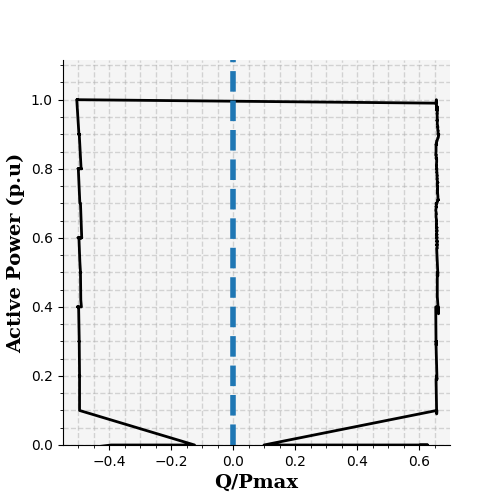

Text(0.5, 0, 'Q/Pmax')

In [11]:
p=[data['P/P'][i] for i in reversed(range(360))]
p=p+data['P/P'][360:].tolist()
q=[data['Q/P'][i] for i in reversed(range(360))]
q=q+data['Q/P'][360:].tolist()
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(q,f,label='V(Q)',linewidth=2,c='k')
# l2 = ax.plot(data['Q/Pmax'],0.85*np.ones(len(data['V(p.u)'])),linewidth=2,c=l1[0].get_color())
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


In [36]:
f=[data['P/P'][i] for i in reversed(range(334))]

In [8]:
f

[-0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 -0.01,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
